# Assignment 3
This assignment deals with using `textblob` and other open-source libraries to perform NLP-based analysis on documents using Python.  **All parts should use the same three documents (as outlined in Part 1 below).  In addition to your .ipynb and/or .py files, you must submit the three documents in .txt format, as well as a report document in .txt/.pdf format that answers various questions below.  It is not necessary to submit the .csv file for Part 3, since we will be executing your code.  _Just make sure it works correctly!_**  

**Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 

In [92]:
from textblob import TextBlob
# Movie Script: Moana
with open('Moana.txt', 'r') as file:
    text = file.read()

moana_blob = TextBlob(text)
# Poem: O Captain! My Captain! by Walt Whitman
with open('Poem.txt', 'r') as file:
    text = file.read()

poem_blob = TextBlob(text)

# Research Paper: Artificial intelligence and its scope in different areas with special reference to the field of education by Mudit Verma
with open('Research_paper.txt', 'r') as file:
    text = file.read()

paper_blob = TextBlob(text)


**Part 2:**<br>
(a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization and/or other preprocessing that you would like to employ).<br>
(b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).<br>
(c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words.  Note that you'll likely want to use the approach outlined in Session 25 that utilizes the `fitwords` method, since you will want data consistent with those for part (b).<br>(d) Do you see any notable difference between the documents wrt (b) and/or (c) above?  Try to explain why or why not, and whether or not these results are expected.<br>

In [93]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

moana_usable_words = [word for word in moana_blob.words if word.lower() not in stops and "'" not in word]
poem_usable_words = [word for word in poem_blob.words if word.lower() not in stops and "'" not in word]
paper_usable_words = [word for word in paper_blob.words if word.lower() not in stops and "'" not in word]

print("Moana Word Count:" + str(len(moana_usable_words)))
print("Poem Word Count:" + str(len(poem_usable_words)))
print("Paper Word Count:" + str(len(paper_usable_words)))

Moana Word Count:3076
Poem Word Count:108
Paper Word Count:610


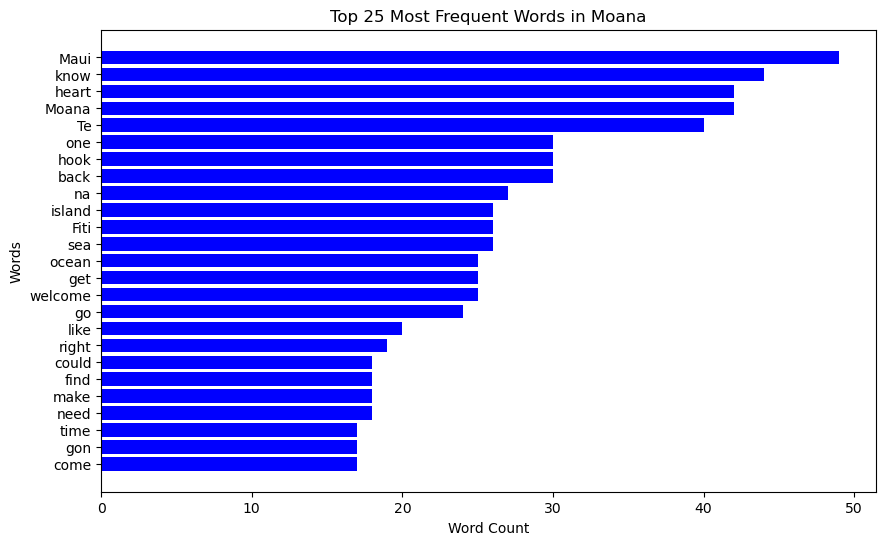

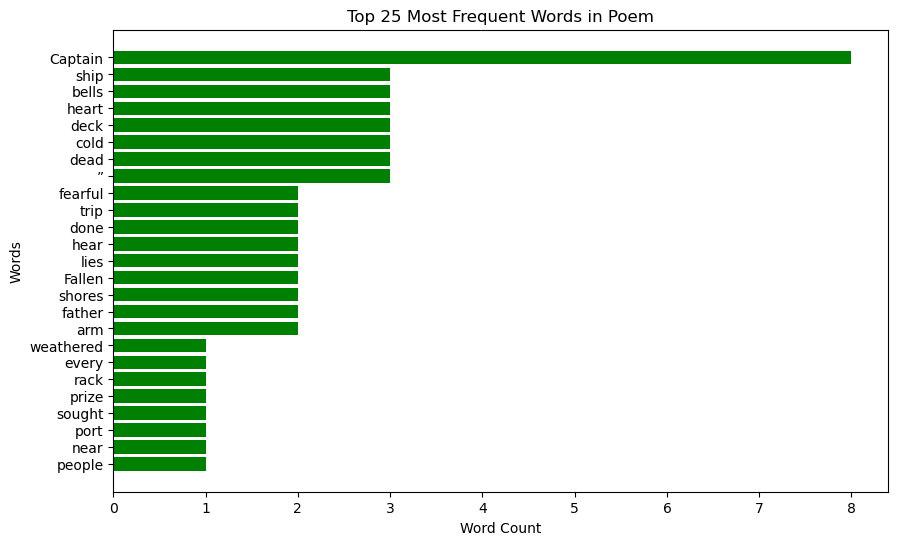

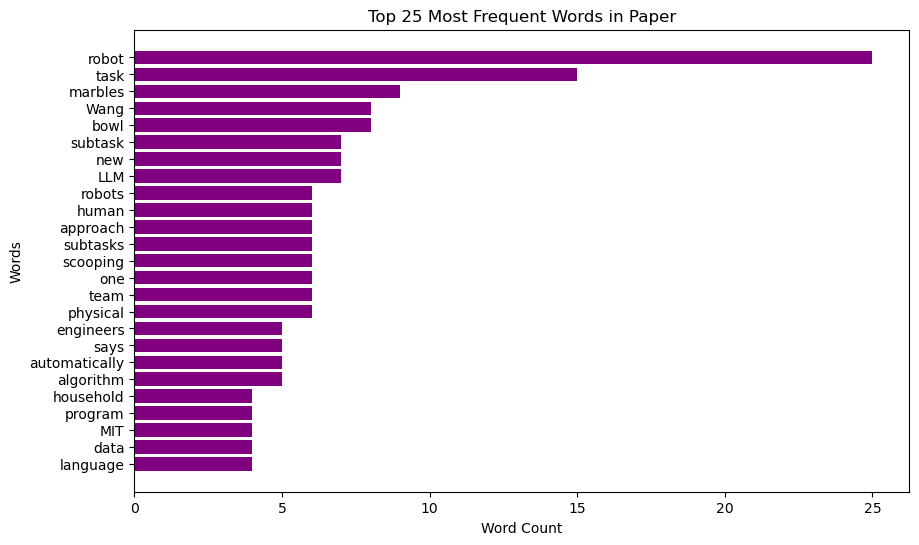

In [95]:
from collections import Counter
import matplotlib.pyplot as plt

moana_word_counts = Counter(moana_usable_words)
poem_word_counts = Counter(poem_usable_words)
paper_word_counts = Counter(paper_usable_words)

moana_top_words = moana_word_counts.most_common(25)
poem_top_words = poem_word_counts.most_common(25)
paper_top_words = paper_word_counts.most_common(25)

moana_words, moana_counts = zip(*moana_top_words)
plt.figure(figsize=(10, 6))
plt.barh(moana_words, moana_counts, color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 25 Most Frequent Words in Moana')
plt.show()

poem_words, poem_counts = zip(*poem_top_words)
plt.figure(figsize=(10, 6))
plt.barh(poem_words, poem_counts, color='green')
plt.gca().invert_yaxis()
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 25 Most Frequent Words in Poem')
plt.show()

paper_words, paper_counts = zip(*paper_top_words)
plt.figure(figsize=(10, 6))
plt.barh(paper_words, paper_counts, color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 25 Most Frequent Words in Paper')
plt.show()

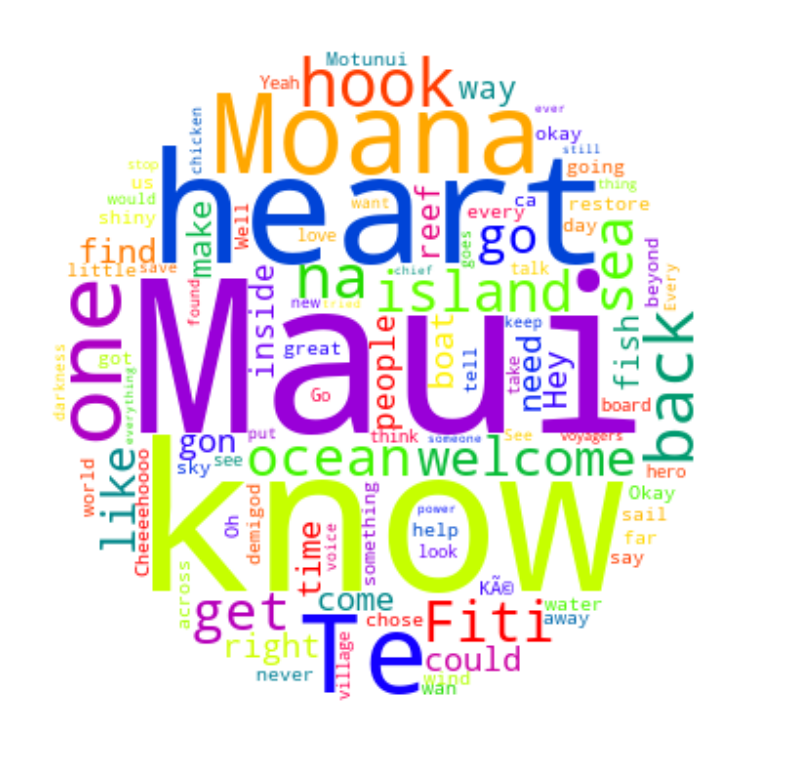

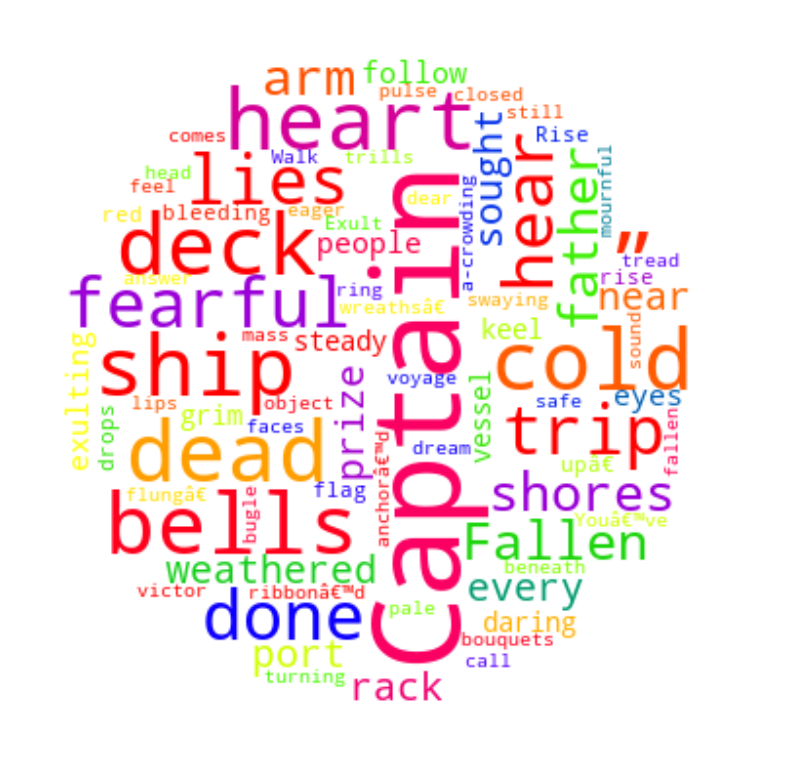

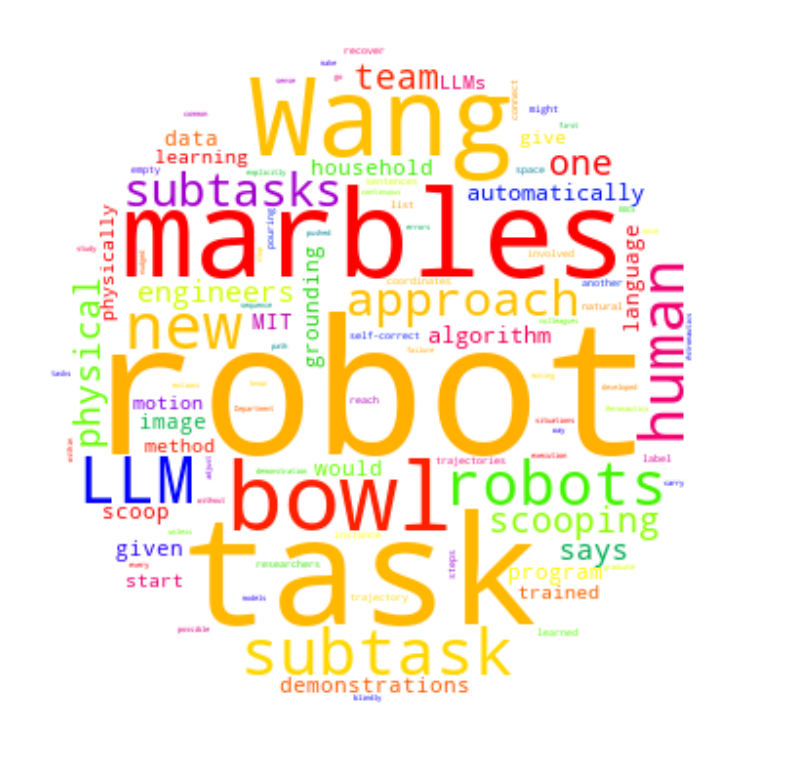

In [96]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

moana_top_100_words = moana_word_counts.most_common(100)
poem_top_100_words = poem_word_counts.most_common(100)
paper_top_100_words = paper_word_counts.most_common(100)

mask_image = np.array(Image.open("circle.png"))

wordcloud_moana = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')
wordcloud_moana.fit_words(dict(moana_top_100_words))

wordcloud_poem = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')
wordcloud_poem.fit_words(dict(poem_top_100_words))

wordcloud_paper = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')
wordcloud_paper.fit_words(dict(paper_top_100_words))


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_moana, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_poem, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_paper, interpolation='bilinear')
plt.axis('off')
plt.show()

**Part 3:**<br>
(a) Using your approach from **Part 2**, compute the 25 most _cumulatively commmon_ words across the three documents, along with the _cumulative counts_.  Remember that a given word can appear in 2 or even all 3 documents.  <br>
Ex: if the word "spider" appears 10 times in document 1, 6 times in document 2, and 5 times in document 3, its cumulative count will be 21.<br>
(b) Create a CSV file named **MCW.csv** with the following specifications:
i. The csv file should use the standard delimiter (,) <br> 
ii. The first row in the file should be a column header row denoted by the string "Word,Count" <br>
iii. The next 25 rows should be populated with the pairs of the 25 most cumulatively common words and counts, in descending order by count. <br>
iv. One final row should added of the form "Sum,(totalcount)" where (totalcount) represents the sum of the top 25 cumulative counts.<br>
A sample csv file is included to give you an idea of what to generate in practice.<br><br>

In [97]:
set_of_moana_words = set(moana_usable_words)
set_of_poem_words = set(poem_usable_words)
set_of_paper_words = set(paper_usable_words)

common_words_in_all_documents = set_of_moana_words & set_of_poem_words & set_of_paper_words
common_words_in_two_documents = set_of_moana_words & set_of_poem_words | set_of_moana_words & set_of_paper_words | set_of_poem_words & set_of_paper_words

common_words = common_words_in_all_documents | common_words_in_two_documents

common_words_with_frequency = []
for word in common_words:
    if word in moana_usable_words:
        common_words_with_frequency.append(word)
    if word in poem_usable_words:
        common_words_with_frequency.append(word)
    if word in set_of_paper_words:
        common_words_with_frequency.append(word)
        
print(common_words_with_frequency)

['go', 'go', 'human', 'human', 'long', 'long', 'trip', 'trip', 'kind', 'kind', 'push', 'push', 'lies', 'lies', 'two', 'two', 'path', 'path', 'start', 'start', 'call', 'call', 'still', 'still', 'moment', 'moment', 'top', 'top', 'answer', 'answer', 'could', 'could', 'every', 'every', 'every', 'many', 'many', 'eyes', 'eyes', 'natural', 'natural', 'known', 'known', 'one', 'one', 'must', 'must', 'beneath', 'beneath', 'making', 'making', 'people', 'people', 'deck', 'deck', 'knows', 'knows', 'learned', 'learned', 'next', 'next', 'first', 'first', 'move', 'move', 'last', 'last', 'found', 'found', 'turning', 'turning', 'sure', 'sure', 'carry', 'carry', 'map', 'map', 'feel', 'feel', 'given', 'given', 'sense', 'sense', 'make', 'make', 'daring', 'daring', 'part', 'part', 'arm', 'arm', 'give', 'give', 'food', 'food', 'says', 'says', 'sought', 'sought', 'comes', 'comes', 'safe', 'safe', 'work', 'work', 'dream', 'dream', 'know', 'know', 'continue', 'continue', 'dead', 'dead', 'along', 'along', 'fathe

In [98]:
import csv
import operator

common_word_counts = Counter(common_words_with_frequency)

cumulative_top_words = common_word_counts.most_common(25)

sorted_cumulative_top_words = sorted(cumulative_top_words, key=operator.itemgetter(1), reverse=True)

total_count = sum([count for word,count in sorted_cumulative_top_words])


first_row = ["Word","Count"]
last_row = ["Sum", str(total_count)]

file_path = "MCW.csv"
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(first_row)
    writer.writerows(sorted_cumulative_top_words)
    writer.writerow(last_row)
    


**Part 4:**<br>
(a) Use **Textatistic** to compute the _average_ of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.   
(b) Are there noticeable differences among your documents's readability scores, and would you expect these differences (or lack of differences, if there are none) to be present among documents were you judging their readability manually?

In [102]:
from textatistic import Textatistic

text_moana = Textatistic(moana_blob.raw)
text_poem = Textatistic(poem_blob.raw)
text_paper = Textatistic(paper_blob.raw)

average_score_moana = (text_moana.fleschkincaid_score + text_moana.gunningfog_score + text_moana.smog_score + text_moana.dalechall_score) / 4
average_score_poem = (text_poem.fleschkincaid_score + text_poem.gunningfog_score + text_poem.smog_score + text_poem.dalechall_score) / 4
average_score_paper = (text_paper.fleschkincaid_score + text_paper.gunningfog_score + text_paper.smog_score + text_paper.dalechall_score) / 4

print("Moana: " + str(average_score_moana))
print("Poem: " + str(average_score_poem))
print("Paper: " + str(average_score_paper))

Moana: 3.244042947833057
Poem: 5.770205844332811
Paper: 11.687751725811387


**Part 5:**<br> 
(a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).<br>
(b) Do any of these similarity scores seem higher or lower than you would expect?  Explain your response.

In [100]:
import spacy

nlp = spacy.load("en_core_web_lg")

moana_textDoc = nlp(moana_blob.raw)
poem_textDoc = nlp(poem_blob.raw)
paper_textDoc = nlp(paper_blob.raw)

similarity_1 = moana_textDoc.similarity(poem_textDoc)
similarity_2 = moana_textDoc.similarity(paper_textDoc)
similarity_3 = poem_textDoc.similarity(paper_textDoc)

print("Similarity between Moana and Poem: " + str(similarity_1))
print("Similarity between Moana and Paper: " + str(similarity_2))
print("Similarity between Poem and Paper: " + str(similarity_3))

Similarity between Moana and Poem: 0.8428353448658289
Similarity between Moana and Paper: 0.7614243455687688
Similarity between Poem and Paper: 0.8853624166988832
